In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [124]:
df=pd.read_csv('Online Sales Data.csv')

In [125]:
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [126]:
df.shape

(240, 9)

In [127]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,240.0,10120.500000,69.426220,10001.0,10060.750,10120.50,10180.250,10240.00
Units Sold,240.0,2.158333,1.322454,1.0,1.000,2.00,3.000,10.00
Unit Price,240.0,236.395583,429.446695,6.5,29.500,89.99,249.990,3899.99
Total Revenue,240.0,335.699375,485.804469,6.5,62.965,179.97,399.225,3899.99


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [129]:
df.drop('Transaction ID',axis=1,inplace=True)

In [130]:
df.isnull().sum()

Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

In [131]:
df['Product Name']

0                                        iPhone 14 Pro
1                                     Dyson V11 Vacuum
2                                     Levi's 501 Jeans
3                                    The Da Vinci Code
4                              Neutrogena Skincare Set
                            ...                       
235    Nespresso Vertuo Next Coffee and Espresso Maker
236                          Nike Air Force 1 Sneakers
237             The Handmaid's Tale by Margaret Atwood
238               Sunday Riley Luna Sleeping Night Oil
239                         Yeti Rambler 20 oz Tumbler
Name: Product Name, Length: 240, dtype: object

In [132]:
df.duplicated().sum()

0

In [133]:
corr=df.corr()

In [134]:
import seaborn as sns

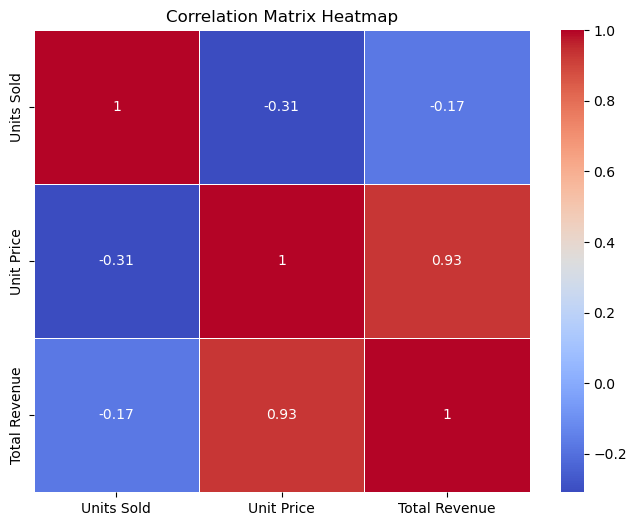

In [135]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [136]:
df['Product Name'].nunique()

232

In [137]:
product_count= df['Product Category'].value_counts()
product_count

Electronics        40
Home Appliances    40
Clothing           40
Books              40
Beauty Products    40
Sports             40
Name: Product Category, dtype: int64

<AxesSubplot:ylabel='Product Category'>

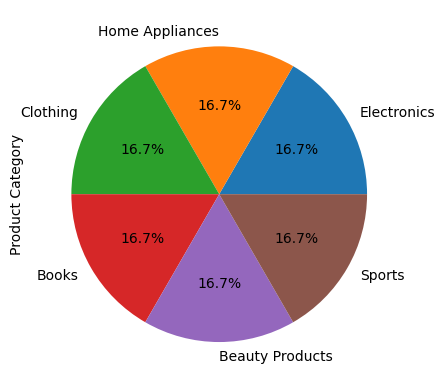

In [138]:
product_count.plot(kind='pie',autopct='%1.1f%%')

In [139]:
df['Product Name'].nunique()

232

In [140]:
df[['Product Category', 'Product Name']].value_counts()

Product Category  Product Name                                    
Home Appliances   Keurig K-Elite Coffee Maker                         2
Electronics       Sony WH-1000XM4 Headphones                          2
Books             The Girl with the Dragon Tattoo by Stieg Larsson    2
                  The Catcher in the Rye by J.D. Salinger             2
                  The Silent Patient by Alex Michaelides              2
                                                                     ..
Clothing          Columbia Fleece Jacket                              1
                  Forever 21 Graphic Tee                              1
                  Gap 1969 Original Fit Jeans                         1
                  Gap Crewneck Sweatshirt                             1
Sports            Yeti Tundra Haul Portable Wheeled Cooler            1
Length: 234, dtype: int64

In [141]:
unity=df.groupby(['Product Name', 'Units Sold']).size()
unity

Product Name                                        Units Sold
1984 by George Orwell                               4             1
Adidas 3-Stripes Shorts                             5             1
Adidas Essential Track Pants                        3             1
Adidas FIFA World Cup Football                      3             1
Adidas Originals Superstar Sneakers                 4             1
                                                                 ..
Yeti Tundra Haul Portable Wheeled Cooler            1             1
Youth to the People Superfood Antioxidant Cleanser  1             1
Zara Summer Dress                                   3             1
iPhone 14 Pro                                       2             1
iRobot Braava Jet M6                                1             1
Length: 239, dtype: int64

In [142]:
#top selling products within each category
df.groupby('Product Category').sum()

,Units Sold,Unit Price,Total Revenue
Product Category,,,
Beauty Products,46,2464.92,2621.90
Books,114,646.12,1861.93
Clothing,145,2701.46,8128.93
Electronics,66,27663.66,34982.41
Home Appliances,59,12807.42,18646.16
Sports,88,10451.36,14326.52


In [143]:
df.groupby(['Product Category','Product Name']).sum()

Units Sold  \
Product Category Product Name                                              
Beauty Products  Anastasia Beverly Hills Brow Wiz                      2   
                 Biore UV Aqua Rich Watery Essence Sunscreen           1   
                 Caudalie Vinoperfect Radiance Serum                   1   
                 CeraVe Hydrating Facial Cleanser                      2   
                 Chanel No. 5 Perfume                                  1   
...                                                                  ...   
Sports           Yeti Rambler 20 oz Tumbler                            2   
                 Yeti Rambler Bottle                                   3   
                 Yeti Rambler Tumbler                                  6   
                 Yeti Roadie 24 Cooler                                 1   
                 Yeti Tundra Haul Portable Wheeled Cooler              1   

                                                              Unit Price  \
Product Category Product Name                                              
Beauty Products  Anastasia Beverly Hills Brow Wiz                  23.00   
                 Biore UV Aqua Rich Watery Essence Sunscreen       15.00   
                 Caudalie Vinoperfect Radiance Serum               79.00   
                 CeraVe Hydrating Facial Cleanser                  14.99   
                 Chanel No. 5 Perfume                             129.99   
...                                                                  ...   
Sports           Yeti Rambler 20 oz Tumbler                        29.99   
                 Yeti Rambler Bottle                               49.99   
                 Yeti Rambler Tumbler                              39.99   
                 Yeti Roadie 24 Cooler                            199.99   
                 Yeti Tundra Haul Portable Wheeled Cooler         399.99   

                                                              Total Revenue  
Product Category Product Name                                                
Beauty Products  Anastasia Beverly Hills Brow Wiz                     46.00  
                 Biore UV Aqua Rich Watery Essence Sunscreen          15.00  
                 Caudalie Vinoperfect Radiance Serum                  79.00  
                 CeraVe Hydrating Facial Cleanser                     29.98  
                 Chanel No. 5 Perfume                                129.99  
...                                                                     ...  
Sports           Yeti Rambler 20 oz Tumbler                           59.98  
                 Yeti Rambler Bottle                                 149.97  
                 Yeti Rambler Tumbler                                239.94  
                 Yeti Roadie 24 Cooler                               199.99  
                 Yeti Tundra Haul Portable Wheeled Cooler            399.99  

[234 rows x 3 columns]

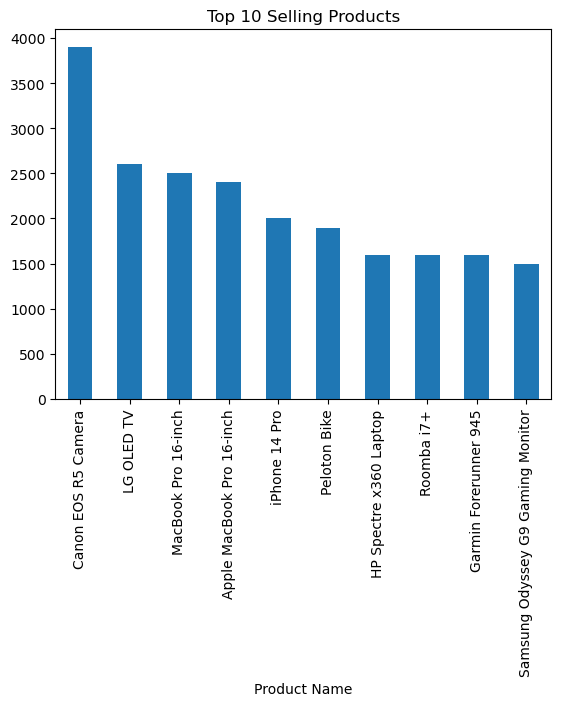

In [151]:
#top 10 selling products on the basis of reveue
top_selling_products = df.groupby('Product Name')['Total Revenue'].sum().sort_values(ascending=False).head(10)
top_selling_products.plot(kind='bar')
plt.title('Top 10 Selling Products based on revenue')
plt.show()

In [155]:
#top 10 best selling products based on units sold
units=df.groupby('Product Name')['Units Sold'].sum().sort_values(ascending=False).head(10)

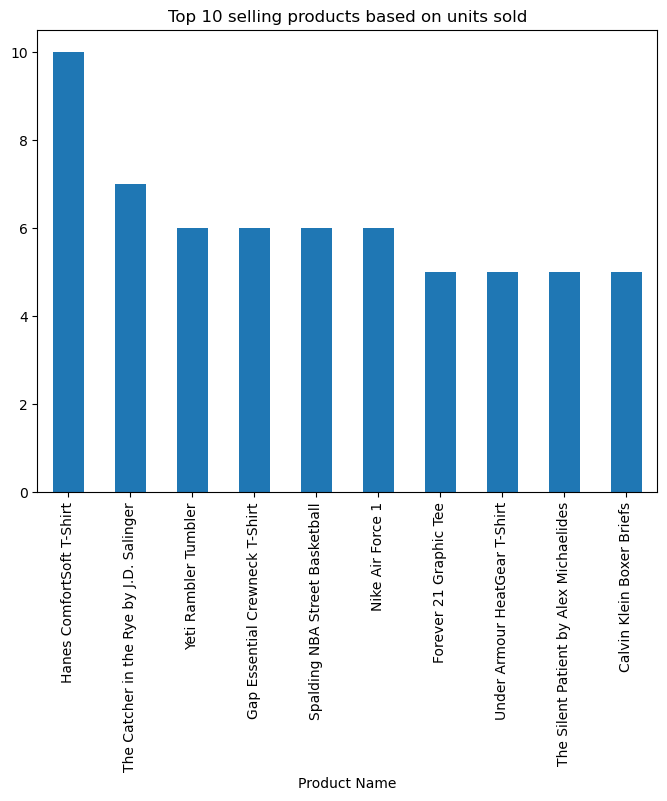

In [160]:
plt.figure(figsize=(8,6))
units.plot(kind='bar')
plt.title('Top 10 selling products based on units sold')
plt.show()

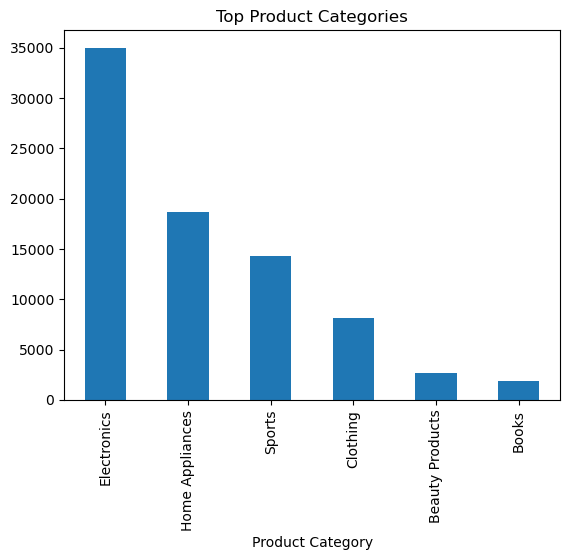

In [163]:
#top category acc to revenue
top_selling_products = df.groupby('Product Category')['Total Revenue'].sum().sort_values(ascending=False).head(10)
top_selling_products.plot(kind='bar')
plt.title('Top Product Categories')
plt.show()

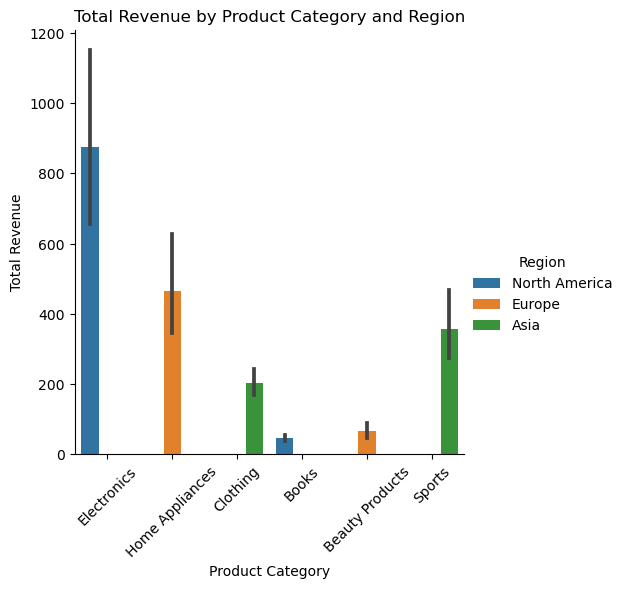

In [164]:
sns.catplot(x='Product Category', y='Total Revenue', hue='Region', kind='bar', data=df)
plt.title('Total Revenue by Product Category and Region')
plt.xticks(rotation=45)
plt.show()

In [169]:
r=df.groupby('Region')['Total Revenue'].sum()

<AxesSubplot:ylabel='Total Revenue'>

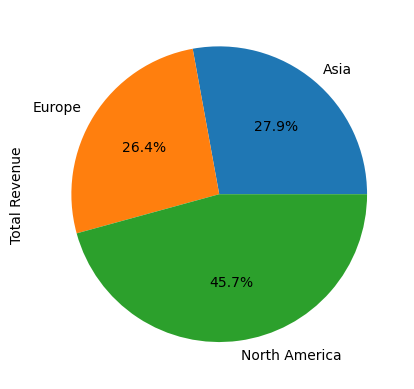

In [176]:
r.plot(kind='pie',autopct='%1.1f%%')

In [177]:
pm=df.groupby('Payment Method')['Total Revenue'].sum()

<AxesSubplot:ylabel='Total Revenue'>

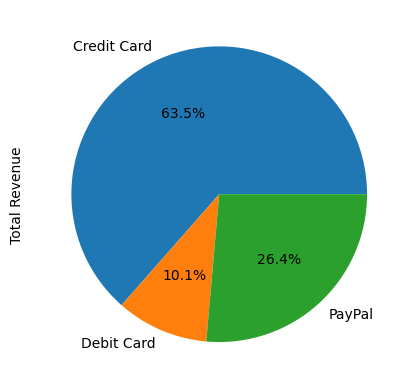

In [178]:
pm.plot(kind='pie',autopct='%1.1f%%')

In [179]:
df

,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...
235,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


In [192]:
X = df.drop('Total Revenue', axis=1)
y = df['Total Revenue']

In [193]:
X.drop(['Date','Product Name','Product Category'],axis=1,inplace=True)

In [194]:
X=pd.get_dummies(X)

In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [196]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [198]:
from sklearn.metrics import r2_score

In [199]:
r2 = r2_score(y_test, predictions)

In [200]:
print(f"R-squared: {r2:.2f}")

R-squared: 0.96


In [202]:
from sklearn.linear_model import LinearRegression

In [203]:
lr=LinearRegression()

In [204]:
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
r2 = r2_score(y_test, pred)

In [205]:
print(f"R-squared: {r2:.2f}")

R-squared: 0.90


In [207]:
model.feature_importances_

array([5.25914099e-02, 9.27189678e-01, 4.73617879e-03, 7.25183666e-04,
       6.13355074e-03, 5.13392804e-03, 2.27817994e-04, 3.26225337e-03])